In [36]:

# data_directory = '../../Data/Raw_training_data/'

# chromosome_number = 4

# file_name = data_directory + f"23AndMe_PRS313_merged_chr{chromosome_number}.parquet"

# import pandas as pd
# df = pd.read_parquet(file_name)

# df[[col for col in df.columns if "PRS313" in col]]


# Visualize LD Proxy Results

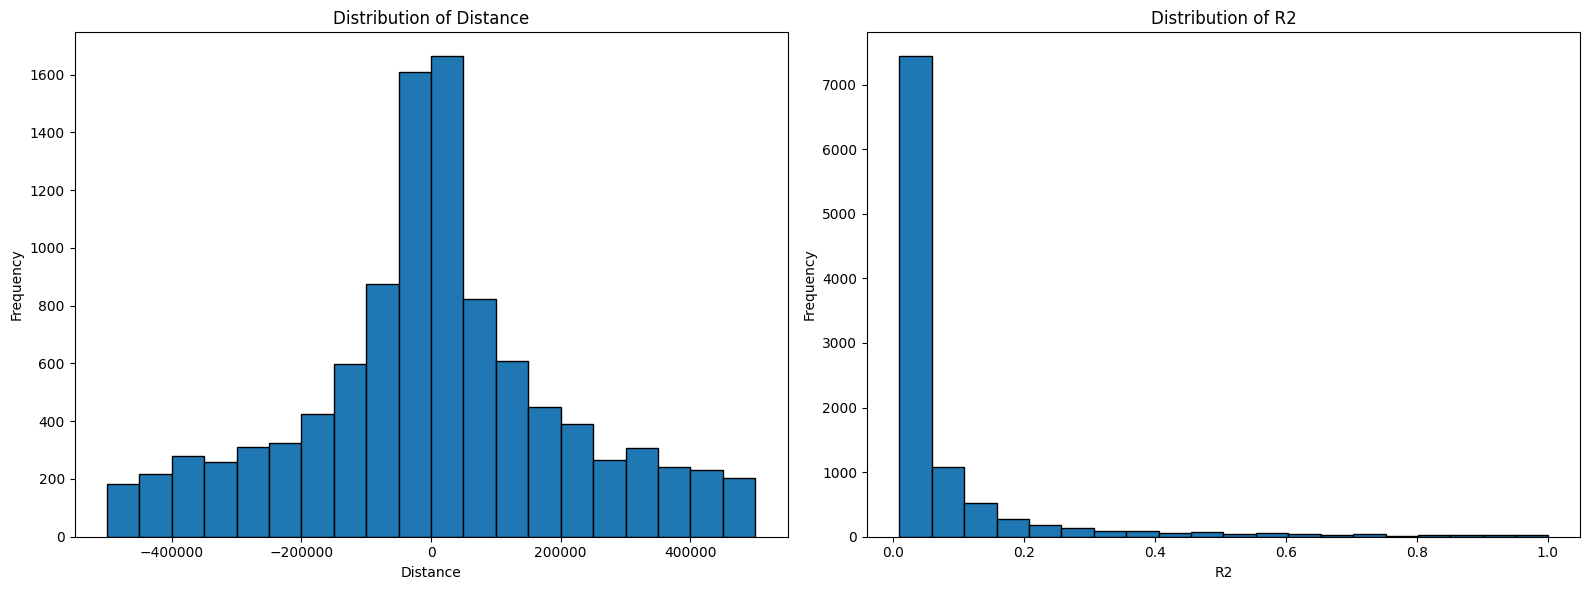

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

LDProxy = "../../Data/Filtered_training_data/23AndMe_matching_variants.csv"
LD = pd.read_csv(LDProxy)

chromosome_number = 8

filtered_df = LD[LD['Coord'].str.startswith(f'chr{chromosome_number}:')]

# Filter out all elements with distance of 0. These elements are the PRS313 SNPs themselves
filtered_df = LD[LD['Distance'] != 0]

# Create a figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot the distribution of Distance
ax1.hist(filtered_df["Distance"], bins=20, edgecolor='black')
ax1.set_title('Distribution of Distance')
ax1.set_xlabel("Distance")
ax1.set_ylabel('Frequency')

# Plot the distribution of R2
ax2.hist(filtered_df["R2"], bins=20, edgecolor='black')
ax2.set_title('Distribution of R2')
ax2.set_xlabel("R2")
ax2.set_ylabel('Frequency')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

In [3]:
data_directory = '../../Data/Filtered_split_training_data/'

chromosome_number = 22
file_name = data_directory + f"23AndMe_PRS313_merged_chr{chromosome_number}_matching_split.parquet"

import pandas as pd
df = pd.read_parquet(file_name)

print("Unknown PRS313 SNPs: " , df[[col for col in df.columns if "PRS313_Unknown" in col]].shape[1])
print("Known PRS313 SNPs: " ,df[[col for col in df.columns if "PRS313_Known" in col]].shape[1])
print("23AndMe SNPs with LD: " ,df[[col for col in df.columns if "PRS313_" not in col]].shape[1])



Unknown PRS313 SNPs:  22
Known PRS313 SNPs:  6
23AndMe SNPs with LD:  498


In [4]:
PRS313 = pd.read_excel('../../Data/PRS313_with_23andMe.xlsx')

# QA to make sure all the PRS313 SNPs are in the 23AndMe training file. 

No SNPs should show up if all the PRS313 SNPs are present 

In [5]:
# See which columns in the PRS313 file are in the 23andMe file

# Columns without the PRS313 suffix by removing all the text after "_PRS313" in all the column names like this chr1_121280613_A_G_PRS313_Known

PRS313_SNPs = df[[col for col in df.columns if "PRS313" in col]]

PRS313_SNPs = PRS313_SNPs.rename(columns=lambda x: x.split('_PRS313')[0])
# "_".join(PRS313_SNPs.columns[0].split("_")[0:2])

PRS313_SNPs = PRS313_SNPs.rename(columns=lambda x: "_".join(x.split('_')[0:2]))

PRS313["pos"] = ["_".join(pos.split('_')[0:2]) for pos in PRS313.pos]


PRS313[(~PRS313.pos.isin(PRS313_SNPs.columns)) & (PRS313["Chromosome"] == chromosome_number)]


,SNPa,Chromosome,Positionb,Reference Allele,Effect Allele,EAFc,Overall Breast Cancerd,ER-positivee,ER-negativef,hybrid ER-positiveg,hybrid ER-negativeh,in_23andMe,pos


# Visualizing the data

In [7]:
import pandas as pd
df_phased = df.copy()

# Get only the columns that have the PRS313 suffix
df_phased = df_phased[[col for col in df.columns if "PRS313" in col]]


In [8]:
df_phased

,chr22_46283297_G_A_PRS313_Unknown_maternal,chr22_46283297_G_A_PRS313_Unknown_paternal,chr22_39343916_T_A_PRS313_Known_maternal,chr22_39343916_T_A_PRS313_Known_paternal,chr22_39343916_T_A_PRS313_Unknown_maternal,chr22_39343916_T_A_PRS313_Unknown_paternal,"chr22_38583315_AAAAG_AAAAGAAAG,AAAAGAAAGAAAG,A_PRS313_Unknown_maternal","chr22_38583315_AAAAG_AAAAGAAAG,AAAAGAAAGAAAG,A_PRS313_Unknown_paternal",chr22_40904707_CT_C_PRS313_Known_maternal,chr22_40904707_CT_C_PRS313_Known_paternal,...,chr22_29203724_C_T_PRS313_Unknown_maternal,chr22_29203724_C_T_PRS313_Unknown_paternal,chr22_29551872_A_G_PRS313_Unknown_maternal,chr22_29551872_A_G_PRS313_Unknown_paternal,chr22_29135543_G_A_PRS313_Unknown_maternal,chr22_29135543_G_A_PRS313_Unknown_paternal,chr22_29121087_A_G_PRS313_Known_maternal,chr22_29121087_A_G_PRS313_Known_paternal,chr22_29121087_A_G_PRS313_Unknown_maternal,chr22_29121087_A_G_PRS313_Unknown_paternal
HG00096,False,False,False,True,False,True,False,False,False,False,...,False,False,True,True,False,False,False,False,False,False
HG00097,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,False,False,False,False,False,False
HG00099,False,False,False,False,False,False,True,True,False,False,...,False,False,True,True,False,False,False,False,False,False
HG00100,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,False,False,False,False,False,False
HG00101,False,False,True,False,True,False,False,False,False,True,...,False,False,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NA21137,False,False,False,True,False,True,True,False,True,False,...,False,False,True,True,False,False,False,False,False,False
NA21141,False,False,True,False,True,False,False,True,False,True,...,False,False,True,True,False,False,False,False,False,False
NA21142,False,False,True,False,True,False,False,True,False,False,...,False,False,True,True,False,True,False,False,False,False
NA21143,False,False,False,True,False,True,True,False,False,False,...,False,False,True,True,True,False,False,False,False,False


In [9]:
import pandas as pd
import plotly.express as px

# Assuming your modified dataframe is named 'df_phased'
# Melt the dataframe to convert it into a long format
melted_df = pd.melt(df_phased)

# Create an interactive pie chart for each column to visualize the distribution of allele dosages
for column in df_phased.columns:
    # Count the occurrences of each allele dosage value
    value_counts = melted_df[melted_df['variable'] == column]['value'].value_counts()
    
    # Create a dataframe for the pie chart
    pie_data = pd.DataFrame({'Allele Dosage': value_counts.index, 'Count': value_counts.values})
    
    # Create the interactive pie chart with consistent colors
    fig = px.pie(pie_data, values='Count', names='Allele Dosage', title=f'Distribution of {column}',
                 color='Allele Dosage', color_discrete_sequence=['red', 'green'])
    
    # Display the pie chart
    fig.show()

In [25]:
import pandas as pd

# Assuming your modified dataframe is named 'df'

# Generate summary statistics for each column
summary_stats = df_phased.describe().mean(axis=1)

# Display the summary statistics
print("Summary Statistics:")
print(summary_stats)

# # Calculate additional statistics
# column_stats = {}
# for column in df_unphased.columns:
#     stats = {
#         'Mean': df_unphased[column].mean(),
#         'Median': df_unphased[column].median(),
#         'Mode': df_unphased[column].mode().values[0],
#         'Standard Deviation': df_unphased[column].std(),
#         'Variance': df_unphased[column].var(),
#         'Skewness': df_unphased[column].skew(),
#         'Kurtosis': df_unphased[column].kurtosis(),
#         'Minimum': df_unphased[column].min(),
#         'Maximum': df_unphased[column].max(),
#         'Count': df_unphased[column].count(),
#         'Unique Values': df_unphased[column].nunique()
#     }
#     column_stats[column] = stats

# # Create a dataframe from the column statistics
# stats_df_unphased = pd.DataFrame.from_dict(column_stats, orient='index')

# # Display the column statistics
# print("\nColumn Statistics:")
# print(stats_df_unphased)

Summary Statistics:
count          2504.0
unique            2.0
top          0.035714
freq      2089.571429
dtype: object
